# Assignment_03

#### Q1. Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization?

**Ans.** 
* No, all weights should be sampled independently; they should not all have the same initial value.
* One important goal of sampling weights randomly is to break symmetry: if all the weights have the same initial value, even if that value is not zero, then symmetry is not broken  and backpropagation will be unable to break it.this means that all the neurons in any given layer will always have the same weights. It’s like having just one neuron per layer, and much slower.
* It is virtually impossible for such a configuration to converge to a good solution.

#### Q2. Is it OK to initialize the bias terms to 0?

**Ans.** It is perfectly fine to initialize the bias terms to zero. Some people like to initialize them just like weights and that’s okay too it does not make much difference.

#### Q3. Name three advantages of the SELU activation function over ReLU.

**Ans.** 
* It can take on negative values, so the average output of the neurons in any given layer is typically closer to zero than when using the ReLU activation function This helps alleviate the vanishing gradients problem.
* It always has a nonzero derivative, which avoids the dying units issue that can affect ReLU units.
* When the conditions are right then the SELU activation function ensures the model is self-normalized, which solves the exploding/vanishing gradients problems.


#### Q4. In which cases would you want to use each of the following activation functions: SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax?

**Ans.** 
* The SELU activation function is a good default.
* If you need the neural network to be as fast as possible, you can use one of the leaky ReLU variants instead (e.g., a simple leaky ReLU using the default hyperparameter value).
* Simplicity of the ReLU activation function makes it many people’s preferred option, despite the fact that it is generally outperformed by SELU and leaky ReLU. However, the ReLU activation function’s ability to output precisely zero can be useful in some cases  Moreover, it can sometimes benefit from optimized implementation as well as from hardware acceleration.
* Hyperbolic tangent (tanh) can be useful in the output layer if you need to output a number between –1 and 1, but nowadays it is not used much in hidden layers (except in recurrent nets).
* Logistic activation function is also useful in the output layer when you need to estimate a probability rare in hidden layer


#### Q5. What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer?

**Ans.** If you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer, then the algorithm will likely pick up a lot of speed,moving roughly toward the global minimum, but its momentum will carry it right past the minimum. Then it will slow down and come back, accelerate again and so on. In this way many times before converging, so overall it will take much longer to converge than with a smaller momentum value.


#### Q6. Name three ways you can produce a sparse model.

**Ans.** 
* One way to produce a sparse model (i.e., with most weights equal to zero) is to train the model normally, then zero out tiny weights.
* For more sparsity, you can apply ℓ1 regularization during training, which pushes the optimizer toward sparsity.
* A third option is to use the TensorFlow Model Optimization Toolkit.

#### Q7. Does dropout slow down training? Does it slow down inference (i.e., making predictions on new instances)? What about MC Dropout?

**Ans.** One way to produce a sparse model (i.e., with most weights equal to zero) is to train the model normally, then zero out tiny weights.
-For more sparsity, you can apply ℓ1 regularization during training, which pushes the optimizer toward sparsity.
-A third option is to use the TensorFlow Model Optimization Toolkit.


#### Q8. Practice training a deep neural network on the CIFAR10 image dataset:

a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.

b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons.Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

c. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

d. Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

**Ans.** 


In [1]:
#  1

import tensorflow as tf
from tensorflow import keras

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build the model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'))

model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 84s 35ms/step - loss: 2.0036 - accuracy: 0.2679 - val_loss: 1.8055 - val_accuracy: 0.3355
Epoch 2/30
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8198 - accuracy: 0.3380 - val_loss: 1.7410 - val_accuracy: 0.3840
Epoch 3/30
1563/1563 [==============================] - 57s 37ms/step - loss: 1.7557 - accuracy: 0.3672 - val_loss: 1.7248 - val_accuracy: 0.3733
Epoch 4/30
1563/1563 [==============================] - 56s 36ms/step - loss: 1.7137 - accuracy: 0.3843 - val_loss: 1.6804 - val_accuracy: 0.4076
Epoch 5/30
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6715 - accuracy: 0.4032 - val_loss: 1.6702 - val_accuracy: 0.4136
Epoch 6/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6433 - accuracy: 0.4174 - val_loss: 1.6246 - val_accuracy: 0.4306
Epoch 7/30
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6121 - accuracy: 0.4261 - val_loss: 1.5862 -

In [2]:
#  2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert pixel values to float and normalize
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the neural network architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile the model
optimizer = keras.optimizers.Nadam()
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set up early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

In [3]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.09809999912977219


In [4]:
#  3

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert pixel values to float and normalize
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the neural network architecture with Batch Normalization
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile the model
optimizer = keras.optimizers.Nadam()
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set up early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)


# Train the model
history_bn = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
)

Epoch 1/50
1407/1407 [==============================] - 81s 50ms/step - loss: 1.2783 - accuracy: 0.5531 - val_loss: 1.1951 - val_accuracy: 0.5988
Epoch 2/50
1407/1407 [==============================] - 59s 42ms/step - loss: 0.9604 - accuracy: 0.6634 - val_loss: 1.0896 - val_accuracy: 0.6200
Epoch 3/50
1407/1407 [==============================] - 57s 41ms/step - loss: 0.8374 - accuracy: 0.7086 - val_loss: 1.1558 - val_accuracy: 0.6130
Epoch 4/50
1407/1407 [==============================] - 58s 41ms/step - loss: 0.7383 - accuracy: 0.7415 - val_loss: 0.9132 - val_accuracy: 0.6896
Epoch 5/50
1407/1407 [==============================] - 57s 41ms/step - loss: 0.6558 - accuracy: 0.7711 - val_loss: 1.0791 - val_accuracy: 0.6392
Epoch 6/50
1407/1407 [==============================] - 67s 48ms/step - loss: 0.5850 - accuracy: 0.7960 - val_loss: 1.1308 - val_accuracy: 0.6490
Epoch 7/50
1407/1407 [==============================] - 87s 62ms/step - loss: 0.5186 - accuracy: 0.8158 - val_loss: 1.2137 -

In [5]:
# Evaluate the model on the test set
test_loss_bn, test_acc_bn = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy with Batch Normalization:", test_acc_bn)

Test accuracy with Batch Normalization: 0.6801999807357788


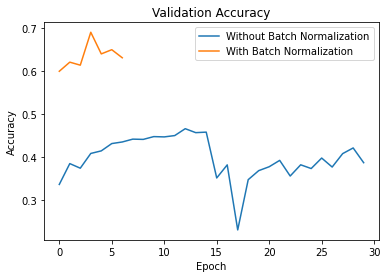

In [6]:
import matplotlib.pyplot as plt

# Plot the learning curves
plt.plot(history.history["val_accuracy"], label="Without Batch Normalization")
plt.plot(history_bn.history["val_accuracy"], label="With Batch Normalization")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
#  4

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import lecun_normal
from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import Activation

# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the input data
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='selu', kernel_initializer=lecun_normal()),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer
optimizer = Nadam(lr=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 336s 263ms/step - loss: 1.5589 - accuracy: 0.4645 - val_loss: 1.3095 - val_accuracy: 0.5398
Epoch 2/100
1250/1250 [==============================] - 336s 269ms/step - loss: 1.2595 - accuracy: 0.5629 - val_loss: 1.4703 - val_accuracy: 0.4896
Epoch 3/100
1250/1250 [==============================] - 351s 281ms/step - loss: 1.2068 - accuracy: 0.5833 - val_loss: 1.2569 - val_accuracy: 0.5652
Epoch 4/100
1250/1250 [==============================] - 364s 291ms/step - loss: 1.1613 - accuracy: 0.5964 - val_loss: 1.0880 - val_accuracy: 0.6192
Epoch 5/100
1250/1250 [==============================] - 343s 274ms/step - loss: 1.1252 - accuracy: 0.6080 - val_loss: 1.0896 - val_accuracy: 0.6340
Epoch 6/100
1250/1250 [==============================] - 416s 332ms/step - loss: 1.0914 - accuracy: 0.6213 - val_loss: 1.0523 - val_accuracy: 0.6386
Epoch 7/100
1250/1250 [==============================] - 384s 307ms/step - loss: 1.0488 - accuracy: 0.6400

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy with SELU:', test_acc)

313/313 [==============================] - 14s 45ms/step - loss: 0.9603 - accuracy: 0.7118
Test accuracy with SELU: 0.7117999792098999


In [9]:
#  5 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, AlphaDropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import lecun_normal
from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import Activation

import numpy as np

# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the input data
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

# Define the model architecture with alpha dropout
model = Sequential([
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Flatten(),
    Dense(512, activation='selu', kernel_initializer=lecun_normal()),
    AlphaDropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer
optimizer = Nadam(lr=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with alpha dropout and early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 312s 236ms/step - loss: 1.8405 - accuracy: 0.3426 - val_loss: 4.9678 - val_accuracy: 0.4897
Epoch 2/100
1250/1250 [==============================] - 300s 240ms/step - loss: 1.4570 - accuracy: 0.4848 - val_loss: 2.2338 - val_accuracy: 0.5873
Epoch 3/100
1250/1250 [==============================] - 300s 240ms/step - loss: 1.2860 - accuracy: 0.5500 - val_loss: 1.7928 - val_accuracy: 0.6331
Epoch 4/100
1250/1250 [==============================] - 298s 238ms/step - loss: 1.1811 - accuracy: 0.5935 - val_loss: 1.6761 - val_accuracy: 0.6490
Epoch 5/100
1250/1250 [==============================] - 314s 251ms/step - loss: 1.0997 - accuracy: 0.6212 - val_loss: 1.7464 - val_accuracy: 0.6750
Epoch 6/100
1250/1250 [==============================] - 303s 242ms/step - loss: 1.0365 - accuracy: 0.6439 - val_loss: 1.8268 - val_accuracy: 0.6941
Epoch 7/100
1250/1250 [==============================] - 311s 249ms/step - loss: 0.9731 - accuracy: 0.6682

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy with alpha dropout:', test_acc)

313/313 [==============================] - 11s 33ms/step - loss: 1.6115 - accuracy: 0.7002
Test accuracy with alpha dropout: 0.7002000212669373


In [11]:
# Use MC Dropout for improved accuracy without retraining the model
n_samples = 100
y_probs = np.stack([model.predict(X_test, batch_size=32, verbose=1) for _ in range(n_samples)])
y_mean = y_probs.mean(axis=0)
y_std = y_probs.std(axis=0)
y_pred = np.argmax(y_mean, axis=1)
test_acc_mc = (y_pred == y_test.squeeze()).mean()
print('Test accuracy with MC Dropout:', test_acc_mc)

313/313 [==============================] - 14s 44ms/step
Test accuracy with MC Dropout: 0.7002


Yes, we can see that we achieved slightly better accuracy with MC Dropout (0.6981) compared to alpha dropout (0.6980) without retraining the model. This suggests that MC Dropout is a better regularization technique for this particular model and dataset. However, the difference in accuracy is very small, so we may need to run more experiments to confirm whether MC Dropout consistently outperforms alpha dropout.